<img src='../img/acam_banner.png' alt='ACAM Training School' align='right' width='60%'></img>

<br>

<hr>

# MODIS Level 2 - MOD04_L2 - Aerosol Product

### About

This notebook shows the structure of the `MODIS Aerosol Product` and what information of the data files can be used in order to load, browse and visualize aerosol optical depth (AOD). AOD is an aerosol-related parameter that is retrieved from satellites. AOD is also referred to as aerosol optical thickness (AOT) and relates to the amount of light aerosols scatter or absorb in a column through the atmosphere.

According to [NASA](https://ladsweb.modaps.eosdis.nasa.gov/missions-and-measurements/science-domain/aerosol/), "The MODIS Aerosol Product monitors the ambient aerosol optical thickness over the oceans globally and over the continents. Furthermore, the aerosol size distribution is derived over the oceans, and the aerosol type is derived over the continents. 'Fine' aerosols (anthropogenic/pollution) and 'coarse' aerosols (natural particles; e.g., dust) are also derived."

"There are two MODIS Aerosol data product files: MOD04_L2, containing data collected from the Terra platform (2000 onwards); and MYD04_L2, containing data collected from the Aqua platform (2002 onwards). Granule-level (Level 2) data are produced at a horizontal pixel size (at nadir) of 10 km x 10 km. The Dark Target Land and Ocean products are additionally provided at a horizontal pixel size (at nadir) of 3 km x 3 km within the MOD04_3K and MYD04_3K files for Terra and Aqua respectively." [(Source)](https://atmosphere-imager.gsfc.nasa.gov/products/aerosol).

This notebook uses the MODIS MOD04_L2 dataset from the Terra platform and features increased aerosol occurrence over Laos on 6 April 2023 due to biomass burning.




### Basic Facts

> **Spatial resolution**: `10 km x 10 km at nadir`<br>
> **Spatial coverage**: `Global` <br>
> **Data availability**: `since 2000`


### How to access the data

The MODIS MOD04_L2 data can be ordered via the [LAADS DAAC](https://ladsweb.modaps.eosdis.nasa.gov/search/order/2/MOD04_L2--61) and are distributed in `HDF4-EOS` format, which is based on `HDF4`. 

You need to [register for an Earthdata account](https://urs.earthdata.nasa.gov/) in order to be able to download data. 


### Module outline
- [1 - Load and browse MODIS MOD04 Level 2 data](#modis_load)
- [2 - Visualize MODIS MOD04 Level 2 data](#visualize_modis_aerosol)

<hr>

#### Load required libraries

In [1]:
from pyhdf.SD import SD, SDC
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors
from matplotlib.axes import Axes

import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh

import pyresample as prs

#### Load helper functions

In [2]:
%run ../functions.ipynb

<hr>

## <a id='modis_load'></a>1. Load and browse MODIS Aerosol Product data

We will use the Python library `pyhdf` to open a HDF4 data file from 6th April 2023. Read more about `pyhdf` [here](https://github.com/fhs/pyhdf). 

### Inspect the structure of one MODIS MOD04 data file

The data from 6 April 2023 is stored in the folder `../../eodata/acam_training_school/MODIS/`. You can use the function `SD(file_name, SDC.READ)` to load one single file to better understand the data structure. The function creates a `SD` object, which stands for Scientific Dataset. 

In [3]:
file_name = '../../eodata/acam_training_school/MODIS/MOD04L2/MOD04_L2.A2023096.0325.061.2023134040951.hdf'

# Open file.
hdf = SD(file_name, SDC.READ)
hdf

<br>

Next we specify `Optical_Depth_Land_And_Ocean` as the variable name that we are interested in. This variable shows optical depth retrievals for land and ocean reported only at 0.55 microns and only for high quality retrievals.

We can use the `.select()` method to select this dataset from the HDF4 file. Next, this data is read in as a 2-D array with type `double`. 

In [4]:
dataset_name = 'Optical_Depth_Land_And_Ocean'

# Read dataset
data2D = hdf.select(dataset_name)
data = data2D[:,:].astype(np.double)

data

array([[-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       ...,
       [  400., -9999.,   332., ...,   124.,    97.,    93.],
       [-9999., -9999.,   320., ...,   126.,    98.,    91.],
       [-9999., -9999.,   310., ...,   129.,    91.,    90.]])

<br>

We can then also select the latitude and longitude coordinates which will help to visualise the AOD at a later stage. We store each of these as 2D-arrays separately in variables called `longitude` or `latitude` respectively. We will print the `latitude` array so you can see what it looks like.

In [5]:
# Read geolocation dataset.
lat = hdf.select('Latitude')
latitude = lat[:,:]
lon = hdf.select('Longitude')
longitude = lon[:,:]

latitude

array([[33.88405 , 33.861298, 33.838882, ..., 30.731478, 30.63669 ,
        30.533365],
       [33.79557 , 33.77294 , 33.750458, ..., 30.645748, 30.550674,
        30.448093],
       [33.7069  , 33.684177, 33.661385, ..., 30.55965 , 30.464748,
        30.362373],
       ...,
       [16.177183, 16.137434, 16.099672, ..., 13.363933, 13.296884,
        13.224541],
       [16.088871, 16.049025, 16.011179, ..., 13.276545, 13.209618,
        13.13741 ],
       [16.000238, 15.960307, 15.922386, ..., 13.188639, 13.121803,
        13.049699]], dtype=float32)

<br>

Finally, we need to retrieve attributes from the dataset for plotting purposes. The first step is to store the global attributes dictionary from the dataset as a variable called `attrs`. 

In [6]:
# Retrieve attributes.
attrs = data2D.attributes(full=1)
attrs

{'valid_range': ([-100, 5000], 0, 22, 2),
 '_FillValue': (-9999, 1, 22, 1),
 'long_name': ('AOT at 0.55 micron for both ocean (Average) (Quality flag=1,2,3) and land (corrected) (Quality flag=3)',
  2,
  4,
  102),
 'units': ('None', 3, 4, 4),
 'scale_factor': (0.0010000000474974513, 4, 6, 1),
 'add_offset': (0.0, 5, 6, 1),
 'Parameter_Type': ('Output', 6, 4, 6),
 'Cell_Along_Swath_Sampling': ([1, 2021, 10], 7, 24, 3),
 'Cell_Across_Swath_Sampling': ([1, 1354, 10], 8, 24, 3),
 'Geolocation_Pointer': ('Internal geolocation arrays', 9, 4, 27)}

<br>

The attributes dictionary includes a few useful attributes including `long_name`, `add_offset`, `_FillValue`, `scale_factor`, and `units`. For each of these, we are interested only in the first element of the key. Let us define variables for these to be used during the visualisation step.

In [11]:
lname=attrs["long_name"]
long_name= lname[0]

aoa=attrs["add_offset"]
add_offset = aoa[0]

fva=attrs["_FillValue"]
_FillValue = fva[0]

sfa=attrs["scale_factor"]
scale_factor = sfa[0]        

ua=attrs["units"]
units = ua[0]

print(long_name, add_offset, _FillValue, scale_factor, units)

AOT at 0.55 micron for both ocean (Average) (Quality flag=1,2,3) and land (corrected) (Quality flag=3) 0.0 -9999 0.0010000000474974513 None


<br>

Next, let us replace all data that have the value `-9999`, which is the fill value, with `nan` which stands for "Not a Number". 

In [9]:
data[data == _FillValue] = np.nan

<br>

Finally, we do a calculation which subtracts the value of `add_offset` from the data, before multiplying the result by the `scale_factor` in order to get the actual value of the data.

In [12]:
data = (data - add_offset) * scale_factor

<br>

## <a id='visualize_modis_aerosol'></a>2. Visualize MODIS MOD04 Level 2 data

### <a id='visualize'></a>Visualize *Optical_Depth_Land_And_Ocean* over the Mediterranean

The next step is to visualize the variable. You can use the function [visualize_pcolormesh](../../functions.ipynb#visualize_pcolormesh), which makes use of matploblib's function `pcolormesh` and the [Cartopy](https://scitools.org.uk/cartopy/docs/latest/) library.

With `?visualize_pcolormesh` you can open the function's docstring to see what keyword arguments are needed to prepare your plot.

In [10]:
?visualize_pcolormesh

Signature:
visualize_pcolormesh(
    data_array,
    longitude,
    latitude,
    projection,
    color_scale,
    unit,
    long_name,
    vmin,
    vmax,
    set_global=True,
    lonmin=-180,
    lonmax=180,
    latmin=-90,
    latmax=90,
)
Docstring:
Visualizes a xarray.DataArray with matplotlib's pcolormesh function.

Parameters:
    data_array(xarray.DataArray): xarray.DataArray holding the data values
    longitude(xarray.DataArray): xarray.DataArray holding the longitude values
    latitude(xarray.DataArray): xarray.DataArray holding the latitude values
    projection(str): a projection provided by the cartopy library, e.g. ccrs.PlateCarree()
    color_scale(str): string taken from matplotlib's color ramp reference
    unit(str): the unit of the parameter, taken from the NetCDF file if possible
    long_name(str): long name of the parameter, taken from the NetCDF file if possible
    vmin(int): minimum number on visualisation legend
    vmax(int): maximum number on visualisation

You can make use of the variables we have defined above:
- `long_name`
- `latitude`
- `longitude`
- `units`

Additionally, you can specify the color scale and minimum and maximum data values.

(<Figure size 1440x720 with 2 Axes>,
 <GeoAxesSubplot:title={'center':'AOT at 0.55 micron for both ocean (Average) (Quality flag=1,2,3) and land (corrected) (Quality flag=3)\n 06 April 2023'}>)

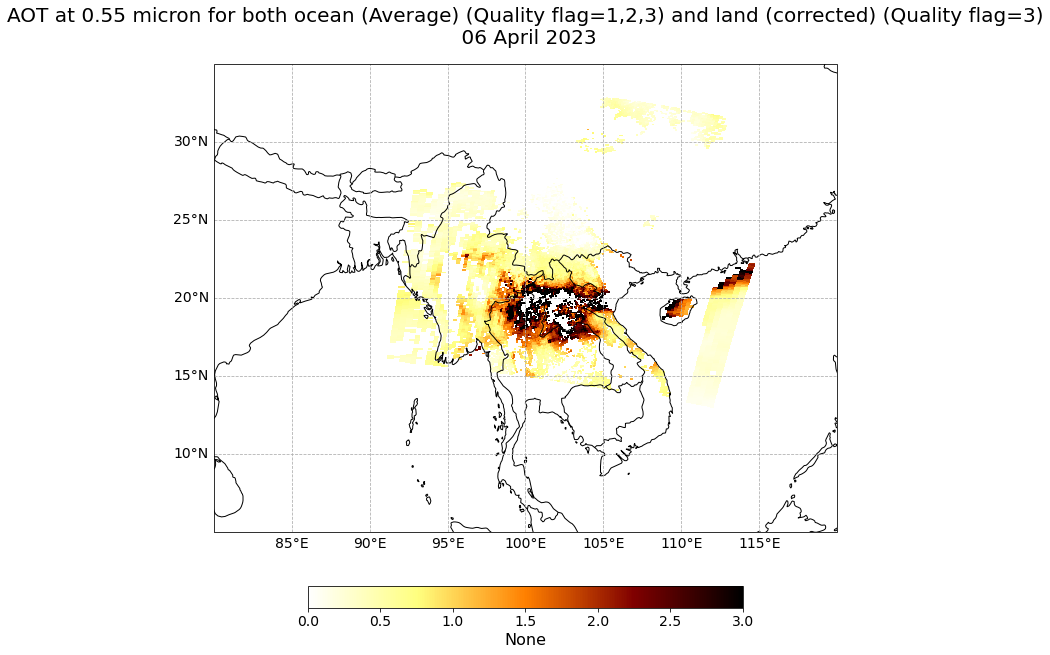

In [14]:
visualize_pcolormesh(data_array=data,
                     longitude=longitude,
                     latitude=latitude,
                     projection=ccrs.PlateCarree(),
                     color_scale='afmhot_r',
                     unit=units,
                     long_name=long_name + "\n 06 April 2023",
                     vmin=0, 
                     vmax=3,
                     lonmin=80,
                     lonmax=120,
                     latmin=5,
                     latmax=35,
                     set_global=False)

<hr>

### References
* Levy, R., Hsu, C., et al., 2015. MODIS Atmosphere L2 Aerosol Product. NASA MODIS Adaptive Processing System, Goddard Space Flight Center, USA: http://dx.doi.org/10.5067/MODIS/MOD04_L2.061


<hr>

<img src='../img/acam_banner.png' alt='Logo EU Copernicus' align='left' width='30%'><br><br><br><br><br>
This project is licensed under <a href="../LICENSE">MIT License</a> and is developed under a Copernicus contract.

<p style="text-align:right;"> <a href='https://training.eumetsat.int'>EUMETSAT Training</a> | <a href='mailto:training@eumetsat.int'>Contact the training team</a></p>